In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [10]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [19]:
# Read all the files
df_gamesnfl = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2025/games.csv")
#df_playerplays = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2025/player_play.csv")
#df_players = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2025/players.csv")
#df_plays = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2025/plays.csv")
#df_trackingweek1 = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2025/tracking_week_1.csv")
#df_trackingweek2 = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2025/tracking_week_2.csv")
#df_trackingweek3 = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2025/tracking_week_3.csv")
#df_trackingweek4 = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2025/tracking_week_4.csv")
#df_trackingweek5 = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2025/tracking_week_5.csv")
#df_trackingweek6 = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2025/tracking_week_6.csv")
#df_trackingweek7 = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2025/tracking_week_7.csv")
#df_trackingweek8 = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2025/tracking_week_8.csv")
#df_trackingweek9 = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2025/tracking_week_9.csv")

In [20]:
# Read few rows of each dataframe 
print(df_gamesnfl.head())

       gameId  season  week   gameDate gameTimeEastern homeTeamAbbr  \
0  2022090800    2022     1   9/8/2022        20:20:00           LA   
1  2022091100    2022     1  9/11/2022        13:00:00          ATL   
2  2022091101    2022     1  9/11/2022        13:00:00          CAR   
3  2022091102    2022     1  9/11/2022        13:00:00          CHI   
4  2022091103    2022     1  9/11/2022        13:00:00          CIN   

  visitorTeamAbbr  homeFinalScore  visitorFinalScore  
0             BUF              10                 31  
1              NO              26                 27  
2             CLE              24                 26  
3              SF              19                 10  
4             PIT              20                 23  


In [21]:
# Set out the inspection: min, max, mean, etc.
print(df_gamesnfl.describe())

             gameId  season        week  homeFinalScore  visitorFinalScore
count  1.360000e+02   136.0  136.000000      136.000000         136.000000
mean   2.022099e+09  2022.0    4.845588       22.669118          20.948529
std    5.996614e+03     0.0    2.567254        8.659874           9.731446
min    2.022091e+09  2022.0    1.000000        3.000000           0.000000
25%    2.022093e+09  2022.0    3.000000       17.000000          14.750000
50%    2.022101e+09  2022.0    5.000000       22.500000          20.000000
75%    2.022102e+09  2022.0    7.000000       27.000000          27.000000
max    2.022111e+09  2022.0    9.000000       49.000000          48.000000


In [22]:
# Check for null values, and clean the data with no null values 
print(df_gamesnfl.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   gameId             136 non-null    int64 
 1   season             136 non-null    int64 
 2   week               136 non-null    int64 
 3   gameDate           136 non-null    object
 4   gameTimeEastern    136 non-null    object
 5   homeTeamAbbr       136 non-null    object
 6   visitorTeamAbbr    136 non-null    object
 7   homeFinalScore     136 non-null    int64 
 8   visitorFinalScore  136 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 9.7+ KB
None


In [23]:
# Calculate the sum of misplaced (missing) values for each feature
misplaced_values = df_gamesnfl.isnull().sum()

# Print the count of missing values per column
print("Sum of misplaced (missing) values for each feature:")
print(misplaced_values)

Sum of misplaced (missing) values for each feature:
gameId               0
season               0
week                 0
gameDate             0
gameTimeEastern      0
homeTeamAbbr         0
visitorTeamAbbr      0
homeFinalScore       0
visitorFinalScore    0
dtype: int64


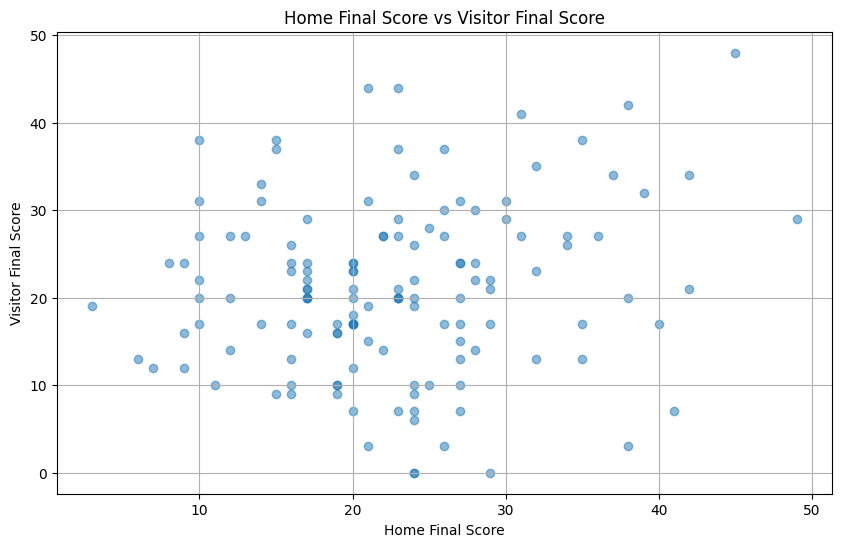

In [24]:
# Exclude specific columns 
colms_to_exclude = ["gameId"] 
df_filtered = df_gamesnfl.drop(columns=colms_to_exclude)

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['homeFinalScore'], 
df_filtered['visitorFinalScore'], alpha=0.5)
plt.title('Home Final Score vs Visitor Final Score')
plt.xlabel('Home Final Score')
plt.ylabel('Visitor Final Score')
plt.grid(True) 
plt.show()

In [25]:
# Check unique values of the 'season' field
unique_seasons = df_gamesnfl["season"].value_counts()
print(unique_seasons)

season
2022    136
Name: count, dtype: int64


In [26]:
# Check unique values of the 'week' field
unique_weeks = df_gamesnfl["week"].value_counts()
print(unique_weeks)

week
1    16
2    16
3    16
4    16
5    16
8    15
6    14
7    14
9    13
Name: count, dtype: int64


In [27]:
# Visitor Team Game Statistics by Team
# Visitor Team Match tally by Team
home_team_counts = df_gamesnfl["visitorTeamAbbr"].value_counts() 
print(home_team_counts)

# Arrange the field with .sort_index()

visitorTeamAbbr
BUF    5
BAL    5
MIA    5
SEA    5
CIN    5
GB     5
LV     5
CHI    5
NE     5
IND    5
TEN    5
PIT    5
SF     5
WAS    4
ARI    4
HOU    4
ATL    4
MIN    4
CAR    4
LAC    4
NYJ    4
DEN    4
TB     4
NYG    4
KC     4
JAX    4
PHI    4
NO     3
CLE    3
DET    3
LA     3
DAL    3
Name: count, dtype: int64


In [28]:
# Display all histories of No games 
No_games = df_gamesnfl[df_gamesnfl["homeTeamAbbr"] == "No"] 
print(No_games)

Empty DataFrame
Columns: [gameId, season, week, gameDate, gameTimeEastern, homeTeamAbbr, visitorTeamAbbr, homeFinalScore, visitorFinalScore]
Index: []


In [29]:
# Ensure the date is in datetime format 
df_gamesnfl["gameDate"] = pd.to_datetime(df_gamesnfl["gameDate"])
# Get the minimum and maximum dates 
min_date = df_gamesnfl["gameDate"].min() 
max_date = df_gamesnfl["gameDate"].max()

# Print the minimum and maximum dates 
print(f"Min Date: {min_date}, Max Date: {max_date}")

Min Date: 2022-09-08 00:00:00, Max Date: 2022-11-07 00:00:00


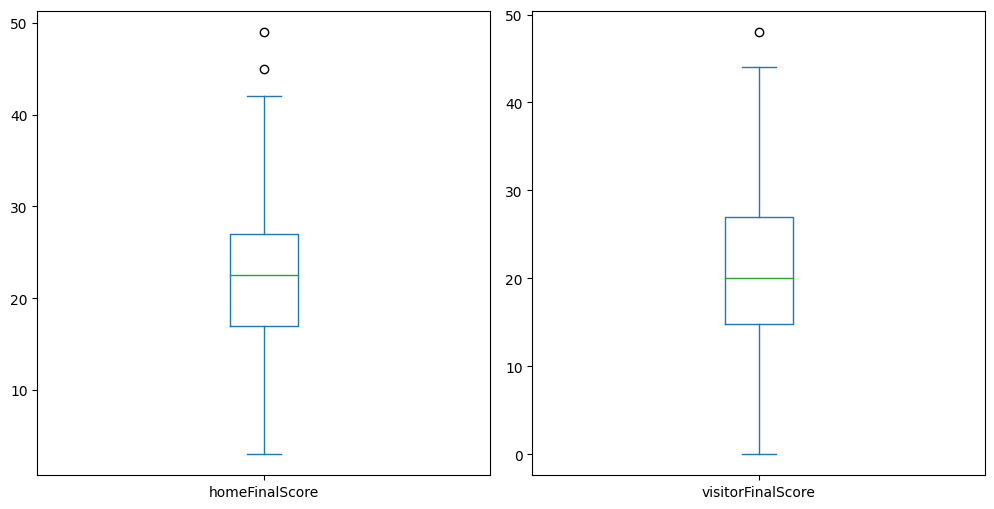

In [30]:
# Check for outliers using a simpler box plot
continous_features = [colm for colm in df_gamesnfl.select_dtypes(include=['number']).columns
                      if colm not in ['gameId', 'week', 'season']]

# Create box plots for each continuous feature
df_gamesnfl[continous_features].plot(kind='box', subplots=True, layout=(2, 3), figsize=(15, 10), sharex=False, sharey=False)
plt.tight_layout()
plt.show()


In [31]:
# Finding correlation between variables
# Create a new DataFrame with continuous features
continuous_df = df_gamesnfl[continous_features]

# Calculate the correlation matrix
correlation = continuous_df.corr()

# Display the correlation matrix
print(correlation)

                   homeFinalScore  visitorFinalScore
homeFinalScore           1.000000           0.151332
visitorFinalScore        0.151332           1.000000


# Plot the correlation matrix
plt.figure(figsize=(30, 14))
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
sns.heatmap(correlation, cmap="Blues", annot=True, annot_kws={'size':12})
plt.title("Correlation Matrix for the Games", fontsize=30)
plt.show()